# MAT 388, HW4

In [1]:
import pathlib
import urllib.request
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import pylab as plt
from random import randint
import cv2 
import os 
import glob 

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

from scipy.io import loadmat
import scipy.stats as stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Conv2D, Embedding, Flatten, ConvLSTM2D

from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, multilabel_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, train_test_split

import matplotlib.pyplot as plt

from keras import models
from keras import layers

## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

Trying to load the data using tfds.load I kept getting an error declining my access to the url.

In [65]:
(train, test),info = tfds.load('celeb_a', split=['train','test'], shuffle_files=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

DownloadError: Failed to get url https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eqftbb0r72o29ftnqc95ttkklhnub15q/1671303150000/13182073909007362810/*/0B7EVK8r0v71pZjFTYXZWM3FlRnM?e=download&uuid=9b459618-0245-4d0d-b241-f95196745cfd. HTTP code: 429.

So I decided to download the data manually by source, and load it locally.

The csv file was easy and quick to load.

In [26]:
attr = pd.read_csv("list_attr_celeba.csv")
attr = attr.iloc[:1000]
attr

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,000996.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,1,-1,1,1,-1,-1
996,000997.jpg,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1
997,000998.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
998,000999.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


However, loading the images from the folder took a lot of time and by this set up, the images get appended to the list. 

I interrupted the process because it was taking too long, but the code works as one of the pictures is printed below.

In [27]:
img_dir = "/Users\sinem\MAT 388E\Assignments\HW 4\img_align_celeba\img_align_celeba"
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    if (f1=='/Users\sinem\MAT 388E\Assignments\HW 4\img_align_celeba\img_align_celeba\000002.jpg'):
        print("h")
        break
    img = cv2.imread(f1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img) 

KeyboardInterrupt: 

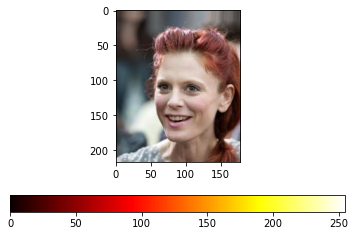

In [28]:
im = plt.imshow(images[1], cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()

When it comes to splitting the data, images that are kept in a list create a problem because I would need arrays. I was unable to continue.

## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

# Q2.1 / 2.2 
Ingesting the image data (ksc) and ground truth data (ksc_gt) directly from the web by using urllib.request.urlretrieve

In [2]:
ksc_url = "http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat"
urllib.request.urlretrieve(ksc_url,"ksc_data.mat")
ksc = loadmat('ksc_data.mat')['KSC']

In [3]:
ksc_gt_url = "http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat"
urllib.request.urlretrieve(ksc_gt_url,"ksc_gt_data.mat")
ksc_gt = loadmat('ksc_gt_data.mat')['KSC_gt']

Here is a random picture from ksc, the sizing looks a little strange but other than that it looks okay.

304


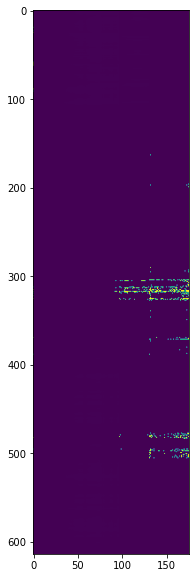

In [4]:
plt.figure(figsize = (10,10))
N = ksc.shape[0]
plt.imshow(ksc[randint(0,N)])
print(randint(0,N))

In [25]:
print(ksc.shape) #512 pictures in ksc
print(ksc_gt.shape)

(512, 614, 176)
(512, 614)


Here I am preparing the data before fitting it to a model. 

After fitting the model I realize that this process is not appropriate for our data and maybe using multi label binarizer was not correct or maybe I should have converted the pictures to vectors. I was unsure.

In [26]:
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(ksc_gt)
Y.shape

(512, 14)

In [28]:
X=ksc 
X.shape

(512, 614, 176)

filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

# Q2.3 / 2.4
Building a convolutional neural network using Conv2Dlayering and testing it by 5 fold cross validation.

In [6]:
kf = KFold(n_splits=5)

In [30]:
for train, test in kf.split(X,Y):
    model = Sequential()
    model.add(Conv2D(filters=3, kernel_size=2, activation='softmax',input_shape=(614,176,1,))) 
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(128, activation='relu')) 
    model.add(Dense(14, activation='sigmoid')) 

    model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [31]:
model.fit(X[train], Y[train],
          batch_size = 32,
          epochs = 15)

Epoch 1/15
13/13 [==============================] - 40s 2s/step - loss: 7.5194 - accuracy: 0.9366
Epoch 2/15
13/13 [==============================] - 29s 2s/step - loss: 2.9825 - accuracy: 0.9878
Epoch 3/15
13/13 [==============================] - 28s 2s/step - loss: 0.7004 - accuracy: 0.9512
Epoch 4/15
13/13 [==============================] - 31s 2s/step - loss: 0.2003 - accuracy: 1.0000
Epoch 5/15
13/13 [==============================] - 29s 2s/step - loss: 0.0467 - accuracy: 1.0000
Epoch 6/15
13/13 [==============================] - 28s 2s/step - loss: 0.0178 - accuracy: 1.0000
Epoch 7/15
13/13 [==============================] - 28s 2s/step - loss: 0.0094 - accuracy: 1.0000
Epoch 8/15
13/13 [==============================] - 29s 2s/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/15
13/13 [==============================] - 28s 2s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 10/15
13/13 [==============================] - 29s 2s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/15
13/13 [

Y_pred is 2 dimensional so I take the highest value from each row, doing the same for Y_test.

In [46]:
Y_pred=model.predict(X[test]) 
Y_pred=np.argmax(Y_pred, axis=1)
Y_test=np.argmax(Y[test], axis=1)

4/4 [==============================] - 2s 497ms/step


The cross table made me realize I did a mistake and later on I was unable to calculate a confidence interval and applying a t test.

In [48]:
res = pd.crosstab(Y_test,Y_pred)
res

col_0,0
row_0,
0,102


In [38]:
xs = res/res.sum(axis=0)
xs

col_0,0
row_0,
0,1.0


In [ ]:
stats.ttest_rel(xs['col1'],xs['col2'])

I remember confusion matrixes might be unrealiable (in terms of being difficult to read and therefore deciding if the model worked well) for multilabeled values, however discovering there is a confusion matrix fit for multilabels, provided by sklearn was a highlight for me and although I misused it here (judging by the result) I will keep learning about it.

In [35]:
multilabel_confusion_matrix(Y_test, Y_pred)

array([[[  0,   0],
        [  0, 102]]], dtype=int64)

The classification report tells me that label 0 was predicted well.

In [36]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

# Q3.1
Ingesting wheat prices datab between Jan 1st 2000 and Dec 31st 2021, using yfinance

In [2]:
# Data we will be working on
wheat1 = yf.download('ZW=F',start='2010-01-01',end='2021-12-31') #year-month-day
wheat1 #(3018)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,544.75,561.25,544.00,557.75,557.75,41278
2010-01-05 00:00:00-05:00,556.75,561.50,552.00,553.00,553.00,36720
2010-01-06 00:00:00-05:00,552.00,567.75,551.00,567.25,567.25,38503
2010-01-07 00:00:00-05:00,566.50,568.00,556.00,557.75,557.75,33873
2010-01-08 00:00:00-05:00,557.50,570.00,545.25,568.50,568.50,33873
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,812.50,820.50,808.25,814.75,814.75,36615
2021-12-27 00:00:00-05:00,817.50,824.00,802.50,804.00,804.00,30210
2021-12-28 00:00:00-05:00,805.75,808.00,781.75,783.50,783.50,41877


# Q3.2
The x_y function I defined, returns 2 parts of the same data, X and Y. I split them randomly as it does not matter because they will be split into training and testing data later on. But X starts from the beginning of the data while Y starts 1 step later than it. They both have the same length.

In [62]:
def x_y(data):
    N=data.shape[0]
    npdata=data.to_numpy().reshape(N,1,)
    X=npdata[:N-1]
    Y=npdata[1:N]
    return X,Y

Getting X and Y values from the wheat openin prices data.

In [63]:
X,Y = x_y(wheat1['Open'])

When it comes to constructing a neural network model, sklearn's time Series cross-validator came in really handly as it is fit for our data. Because it is a time series data it wouldn't be accurate to split it randomly. So, time series split does the job for us, as it's number of splits is 5, by default.

Here is the model.

In [64]:
tscv = TimeSeriesSplit()
for train, test in tscv.split(X,Y):
    
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1,1)))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation = 'relu'))
    
    model.compile(loss='mape', optimizer='adam', metrics = ['mse'])
    
    model.fit(X[train], Y[train], epochs=10, batch_size=5, verbose=0)

The predicted values are below, they are almost stable but also not far off from the actual prices.

In [66]:
Y_pred = model.predict(X[test])
Y_pred

16/16 [==============================] - 0s 2ms/step


array([[[520.17444]],

       [[519.83105]],

       [[519.70404]],

       [[519.70404]],

       [[519.8836 ]],

       [[520.2565 ]],

       [[520.3582 ]],

       [[520.23596]],

       [[520.50934]],

       [[520.6885 ]],

       [[520.3683 ]],

       [[520.6489 ]],

       [[521.00085]],

       [[520.8554 ]],

       [[521.0105 ]],

       [[520.4591 ]],

       [[520.6687 ]],

       [[520.5893 ]],

       [[520.24615]],

       [[520.24615]],

       [[519.77826]],

       [[519.90466]],

       [[520.1127 ]],

       [[520.29724]],

       [[520.0194 ]],

       [[520.09204]],

       [[519.7889 ]],

       [[519.3381 ]],

       [[519.6615 ]],

       [[519.5006 ]],

       [[519.6934 ]],

       [[520.26666]],

       [[520.3582 ]],

       [[520.1333 ]],

       [[519.73596]],

       [[519.2506 ]],

       [[519.26154]],

       [[519.2396 ]],

       [[518.8956 ]],

       [[518.55524]],

       [[518.5323 ]],

       [[518.7604 ]],

       [[518.4517 ]],

       [[51

Here is the comparison represented in a data frame.

In [67]:
res = pd.DataFrame({'X_test': X[test].reshape(X[test].shape[0]), 
                    'Y_test': Y[test].reshape(Y[test].shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

,X_test,Y_test,Y_pred
0,560.75,552.50,520.174438
1,552.50,549.50,519.831055
2,549.50,549.50,519.704041
3,549.50,553.75,519.704041
4,553.75,562.75,519.883606
...,...,...,...
497,796.75,812.50,526.879333
498,812.50,817.50,527.152771
499,817.50,805.75,527.236084
500,805.75,785.25,527.037659


...And the plot

X_test, blue is the opening prices

Y_test is future wheat prices.

and Y_pred is the predicted prices.

By this plot, the model seems confusing but I assume if it ran again and again the stability in the predicted values might break.

It is also interesting to see that today's prices and tomorrow's prices almost mirror each other.

<AxesSubplot:>

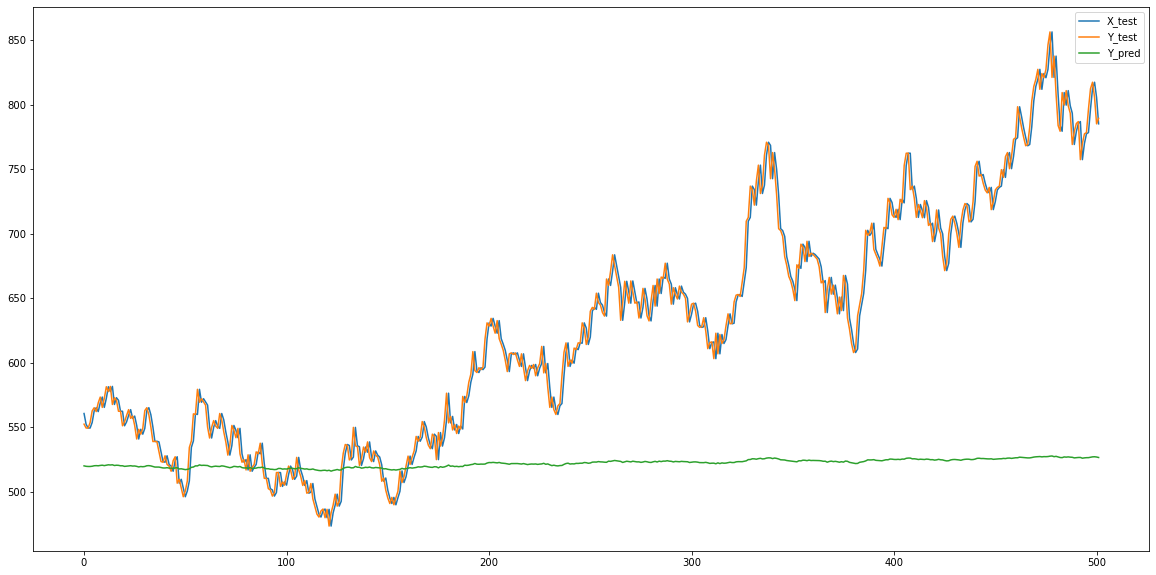

In [71]:
plt.rcParams["figure.figsize"] = (20,10)
res.plot()

# Q3.3

Ingesting the same data but this time from Jan 1st 2022 to today.

In [72]:
# Prices we want to predict
wheat2 = yf.download('ZW=F',start='2022-01-01') #year-month-day
wheat2 #(241)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04 00:00:00-05:00,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05 00:00:00-05:00,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06 00:00:00-05:00,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07 00:00:00-05:00,748.00,760.75,735.50,758.50,758.50,58463
...,...,...,...,...,...,...
2022-12-09 00:00:00-05:00,712.75,712.75,712.75,712.75,712.75,53
2022-12-12 00:00:00-05:00,733.00,733.00,733.00,733.00,733.00,262
2022-12-13 00:00:00-05:00,741.00,742.50,728.75,728.75,728.75,103


In [73]:
X,Y=x_y(wheat2['Open'])

In [82]:
for train, test in tscv.split(X,Y):

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1,1)))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation = 'relu'))

    model.compile(loss='mape', optimizer='adam', metrics = ['mse'])

    model.fit(X[train], Y[train], epochs=10, batch_size=5, verbose=0)

In [83]:
Y_pred = model.predict(X[test])
Y_pred

2/2 [==============================] - 0s 8ms/step


array([[[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.99133]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.9913 ]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99127]],

       [[279.99124]],

       [[279.99124]],

       [[279.9912 ]],

       [[279.99118]],

       [[279.99118]],

       [[279.9912 ]],

       [[279.99115]],

       [[279.99112]],

       [[279.99103]],

       [[279.9911 ]],

       [[279.99103]],

       [[279.99103]],

       [[279.99112]],

       [[279.99115]],

       [[279.9911 ]]], dtype=float32)

In [84]:
res = pd.DataFrame({'X_test': X[test].reshape(X[test].shape[0]), 
                    'Y_test': Y[test].reshape(Y[test].shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

,X_test,Y_test,Y_pred
0,847.00,844.50,279.991302
1,844.50,850.25,279.991302
2,850.25,853.75,279.991302
3,853.75,840.00,279.991302
4,840.00,836.25,279.991302
5,836.25,843.50,279.991302
6,843.50,839.75,279.991302
7,839.75,884.50,279.991302
8,884.50,878.50,279.991302
9,878.50,898.50,279.991302


<AxesSubplot:>

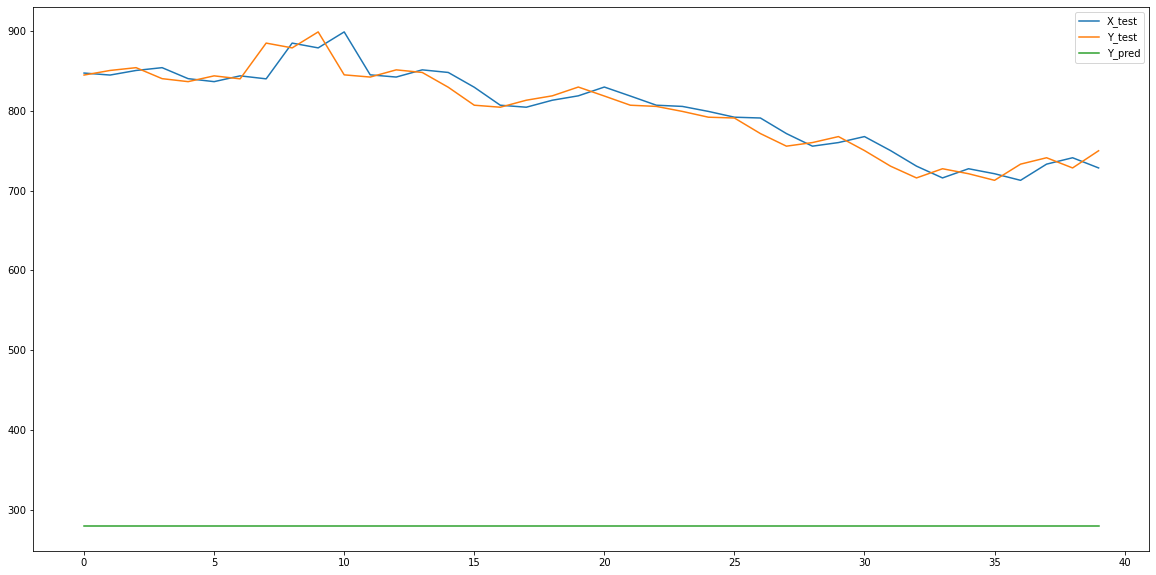

In [85]:
res.plot()

The model is not ideal, however as it did with wheat1 data, it might keep getting better and lose its stability as I train it.

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

# Q4.1
Ingesting the data by the url.

In [3]:
url =  'https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv'
data = pd.read_csv(url)
data = data[['Issue','Timely response?']]

In [4]:
data

,Issue,Timely response?
0,Communication tactics,Yes
1,Cont'd attempts collect debt not owed,Yes
2,"Application, originator, mortgage broker",Yes
3,Other,Yes
4,Cont'd attempts collect debt not owed,Yes
...,...,...
28151,Cont'd attempts collect debt not owed,Yes
28152,Taking out the loan or lease,Yes
28153,"Loan servicing, payments, escrow account",Yes
28154,Can't stop charges to bank account,Yes


# Q4.2
Here I am preparing the data.

replace NaN's with spaces - this should make CountVectorizer happy:
> https://itecnote.com/tecnote/python-raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or/

In [5]:
data['Issue'] = data['Issue'].fillna(' ')

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data.to_numpy()[:,0])
X = X.toarray()

In [36]:
#vectorizer.get_feature_names_out()

In [7]:
encoder = LabelBinarizer()
y = encoder.fit_transform(data.to_numpy()[:,1])

In [8]:
encoder.classes_

array(['No', 'Yes'], dtype='<U3')

# Q4.3
Splitting the data by %75 into train and test.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

# Q4.4
Creating an appropriate neural network model.

The last layer is 1 node, because it is either Yes or No. 1 or 0. And it is in probability form.

In [10]:
model = Sequential() 
model.add(Embedding(2000, 128)) 
model.add(LSTM(128, dropout = 0.25, recurrent_dropout = 0.1)) 
model.add(Dense(128,activation='linear')) 
model.add(Dense(1, activation = 'sigmoid'))  
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

# Q4.5
Testing the model

In [11]:
model.fit(X_train, y_train, 
          batch_size = 8, 
          epochs = 10, 
          validation_data = (X_test, y_test),
         shuffle=False)

Epoch 1/10
2640/2640 [==============================] - 1240s 466ms/step - loss: 0.1234 - accuracy: 0.9743 - val_loss: 0.1221 - val_accuracy: 0.9749
Epoch 2/10
2640/2640 [==============================] - 1377s 522ms/step - loss: 0.1201 - accuracy: 0.9747 - val_loss: 0.1200 - val_accuracy: 0.9749
Epoch 3/10
2640/2640 [==============================] - 1138s 431ms/step - loss: 0.1198 - accuracy: 0.9747 - val_loss: 0.1194 - val_accuracy: 0.9749
Epoch 4/10
2640/2640 [==============================] - 740s 280ms/step - loss: 0.1198 - accuracy: 0.9747 - val_loss: 0.1189 - val_accuracy: 0.9749
Epoch 5/10
2640/2640 [==============================] - 842s 319ms/step - loss: 0.1196 - accuracy: 0.9747 - val_loss: 0.1186 - val_accuracy: 0.9749
Epoch 6/10
2640/2640 [==============================] - 961s 364ms/step - loss: 0.1195 - accuracy: 0.9747 - val_loss: 0.1184 - val_accuracy: 0.9749
Epoch 7/10
2640/2640 [==============================] - 943s 357ms/step - loss: 0.1193 - accuracy: 0.9747 - v

In the end the predicted values I obtain, are probabilities. They are 2 dimensional so to examine the result clearly I flattened it.

In [16]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()

220/220 [==============================] - 7s 33ms/step


In [25]:
p_pred

array([0.9686537 , 0.9686537 , 0.96865225, ..., 0.9686537 , 0.9686537 ,
       0.9686537 ], dtype=float32)

Here they are rounded by 2... just for viewing purposes.

In [21]:
print(p_pred.round(2))

[0.97 0.97 0.97 ... 0.97 0.97 0.97]


The model outputs the predicted probabilities as we saw, we to transform them back to class labels before calculating the classification metrics. Class labels as we remember were the timely responses, 1 (yes) or 0 (no).

> https://stackoverflow.com/questions/69875073/confusion-matrix-valueerror-classification-metrics-cant-handle-a-mix-of-binary

In [18]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 1 1 ... 1 1 1]


In [20]:
print(confusion_matrix(y_test, y_pred))

[[   0  177]
 [   0 6862]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.97      1.00      0.99      6862

    accuracy                           0.97      7039
   macro avg       0.49      0.50      0.49      7039
weighted avg       0.95      0.97      0.96      7039



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The confusion matrix and classification report tells me that, the training did not get any 0's so no data... therefore it was unable to predict that label. However, label 1 seems really good.

For label 1 => yes,

**precision** all those of I predicted as class 1, %97 of them are class 1

**recall:**among those who are in class 1, how many of them I predicted correctly? %100!